# Анализ выбросов в очищенных данных

## Импорт библиотек

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import re

## Открытие данных

In [28]:
df = pd.read_csv('../clean_data.csv', sep=';')

In [29]:
df.sample(3)

,number of rooms,area of apartment,number of floors,apartment floor,price,repair,bathroom,terrace,year of construction,elevator,type of house,parking,district,full address,concierge,garbage chute
1666,3,64.0,10,3,3550000.0,требует ремонта,раздельный,балкон,1993,1.0,панельный,открытая во дворе,Мотовилихинский,"Пермский край, Пермь, ул. Восстания, 13",0,1
1205,3,74.0,3,1,3050000.0,евро,раздельный,балкон,1957,0.0,блочный,открытая во дворе,Кировский,"Пермский край, Пермь, ул. Александра Невского, 28",0,0
809,3,65.0,14,6,5500000.0,дизайнерский,раздельный,балкон,1991,1.0,кирпичный,открытая во дворе,Свердловский,"Пермский край, Пермь, ул. Клары Цеткин, 21А",0,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number of rooms       1894 non-null   int64  
 1   area of apartment     1894 non-null   float64
 2   number of floors      1894 non-null   int64  
 3   apartment floor       1894 non-null   int64  
 4   price                 1894 non-null   float64
 5   repair                1894 non-null   object 
 6   bathroom              1894 non-null   object 
 7   terrace               1894 non-null   object 
 8   year of construction  1894 non-null   int64  
 9   elevator              1894 non-null   float64
 10  type of house         1894 non-null   object 
 11  parking               1640 non-null   object 
 12  district              1894 non-null   object 
 13  full address          1894 non-null   object 
 14  concierge             1894 non-null   int64  
 15  garbage chute        

## Анализ выбросов в количественных признаках

### Обнаружение признаков с выбросами

In [31]:
numeric_features = []
for column in df.columns:
    if str(df[column].dtype) != "object":
        numeric_features.append(column)
print("Количество признаков: " + str(len(numeric_features)))

Количество признаков: 9


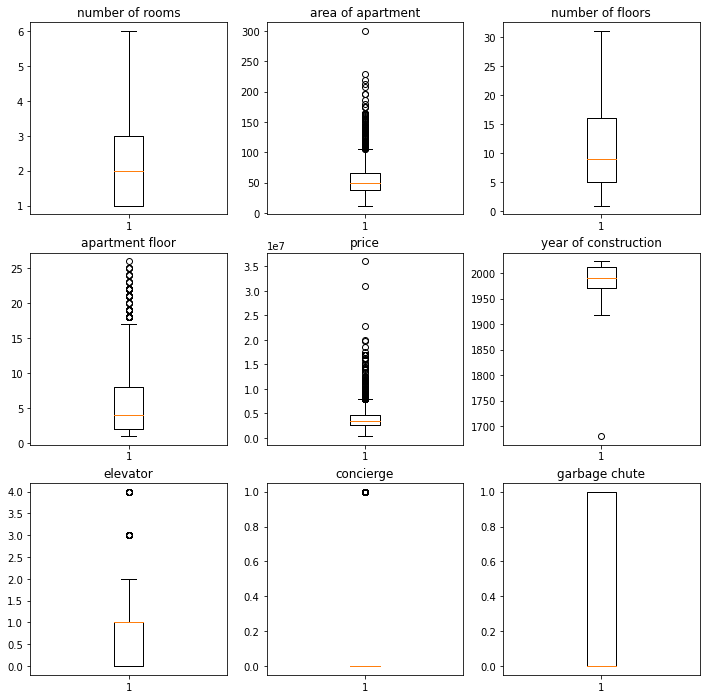

In [32]:
plt.figure(figsize=(12, 12))
for idx, feature in enumerate(numeric_features):
    plt.subplot(3, 3, idx+1)
    plt.boxplot(df[feature])
    plt.title(feature)

Признаки с критическими выбросами:
1. площадь квартиры
2. цена
3. год постройки

Остальные признаки, хотя и содержат выбросы, но порядки, в которых они отличаются от обычных значений, сопоставимы

## Рассмотрение критических выбросов

In [33]:
def info_outliers(df, column):
    q75,q25 = np.percentile(df[column].values, [75, 25])
    intr_qr = q75-q25
    upper_bound = round(q75+(1.5*intr_qr))
    lower_bound = q25-(1.5*intr_qr) if q25-(1.5*intr_qr) > 0 else 0
    print("Нижняя граница: " + str(lower_bound))
    print("Верхняя граница: " + str(upper_bound))
    n_outliers = len(df[(df[column] > upper_bound) | (df[column] < lower_bound)])
    print("Удовлетворяет условию " + str(len(df) - n_outliers) + " из " + str(len(df)) + " квартир") 
    print("Всего выбросов: " + str(n_outliers))

### Выбросы для признака площадь квартиры

In [34]:
info_outliers(df, 'area of apartment')

Нижняя граница: 0
Верхняя граница: 106
Удовлетворяет условию 1803 из 1894 квартир
Всего выбросов: 91


### Выбросы для признака цена квартиры

In [35]:
info_outliers(df, 'price')

Нижняя граница: 0
Верхняя граница: 7906026
Удовлетворяет условию 1763 из 1894 квартир
Всего выбросов: 131


### Выбросы для признака год постройки

In [36]:
info_outliers(df, 'year of construction')

Нижняя граница: 1909.5
Верхняя граница: 2074
Удовлетворяет условию 1893 из 1894 квартир
Всего выбросов: 1


In [37]:
df['year of construction'].min()

1681

По всей вероятности составитель объявления указал 1681 вместо 1981. Поэтому исправим это 

In [38]:
df.loc[(df['year of construction'] == 1681), 'year of construction'] = 1981

In [39]:
info_outliers(df, 'year of construction')

Нижняя граница: 1909.5
Верхняя граница: 2074
Удовлетворяет условию 1894 из 1894 квартир
Всего выбросов: 0


Для признаков цены и площади поступим следующим образом. Посмотрим на диграмму рассеивания для этих признаков

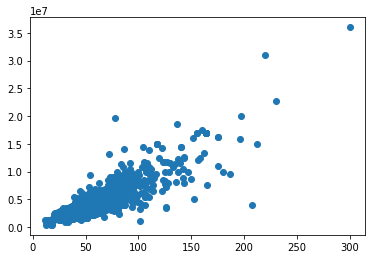

In [40]:
plt.scatter(df['area of apartment'], df.price)

Хотя выбросы и присутствуют, но прослеживается линейная зависимость. Поэтому есть надежда, что даже квартиры за 35 миллионов рублей модель сможет предсказать. Таким образом мы не убираем выбросы для этих признаков.

### Состояние выбросов после анализа

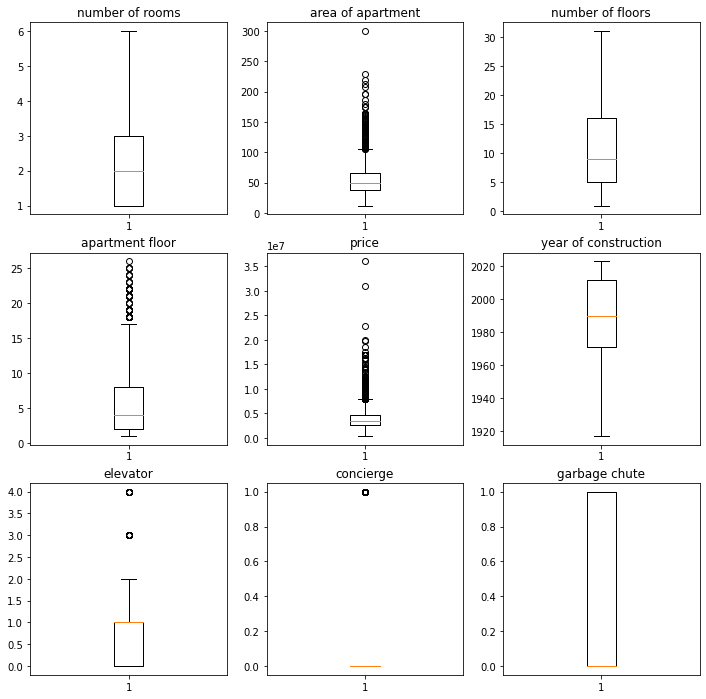

In [41]:
plt.figure(figsize=(12, 12))
for idx, feature in enumerate(numeric_features):
    plt.subplot(3, 3, idx+1)
    plt.boxplot(df[feature])
    plt.title(feature)

## Итоги анализа выбросов

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number of rooms       1894 non-null   int64  
 1   area of apartment     1894 non-null   float64
 2   number of floors      1894 non-null   int64  
 3   apartment floor       1894 non-null   int64  
 4   price                 1894 non-null   float64
 5   repair                1894 non-null   object 
 6   bathroom              1894 non-null   object 
 7   terrace               1894 non-null   object 
 8   year of construction  1894 non-null   int64  
 9   elevator              1894 non-null   float64
 10  type of house         1894 non-null   object 
 11  parking               1640 non-null   object 
 12  district              1894 non-null   object 
 13  full address          1894 non-null   object 
 14  concierge             1894 non-null   int64  
 15  garbage chute        

In [43]:
df.to_csv('../clean_data_without_outliers.csv', sep=';', index=False)

__В ходе второй обработки были:__
1. выявлены признаки с критическими выбросами
2. оставлены выбросы по площади и цене в надежде, что модель сможет их обобщить
3. исправлено неправильно введенное значение года постройки